# TP4 Ridge, Lasso, CV



### Table of Contents

* [0. Data Preparation ](#chapter0)
* [1. Ridge and Lasso Regression ](#chapter1)
* [2. Cross validation for the hyperparameters $\alpha$ of Ridge and Lasso](#chapter2)




## 0. Data Preparation <a class="anchor" id="chapter0"></a>

We will predict the salary of a baseball player and use the dataset `Hitters`.

Reference : book "James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013".

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
import numpy as np
import pandas as pd  # dataframes are in pandas 
import matplotlib.pyplot as plt


hitters = pd.read_csv("Hitters.csv", index_col = "Name")  

hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


**Exercise 1** : 

In `pd.read_csv("Hitters.csv", index_col = "Name") `, what does `index_col = "Name"` mean ? Try without `index_col = "Name"`.



In [183]:
hitters_bis = pd.read_csv("Hitters.csv")  

hitters_bis

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


Answer for ex. 1 : 

index_col = "Name" remouve the fisrt column and use the fist column as index for the row. 

**Exercise 2** :

(1)  Sample size of `Hitters` ? How many features in `Hitters` ?
    
(2)  What are the features in `Hitters` ? 

(3)  Are all the features in $\mathbb{R}$? 

(4)  Are there many missing data ? `print` the number of missing data for each feature. 

- Hint : 
    - (2) et (3) Use `pandas.DataFrame.dtypes`.   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
    - (4) Use `pandas.DataFrame.isnull`.
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
    See the example below. 

In [184]:
# Hint for Question (4) :  

ex = pd.DataFrame(dict(nom=['Alice', 'Nicolas', 'Jean'],
                       age=[19, np.nan, np.nan],
                       exam=[15,14,np.nan]))

print ("data : \n", ex)
print ("First result : \n", ex.isnull())
print ("Second result : \n", ex.isnull().sum())

data : 
        nom   age  exam
0    Alice  19.0  15.0
1  Nicolas   NaN  14.0
2     Jean   NaN   NaN
First result : 
      nom    age   exam
0  False  False  False
1  False   True  False
2  False   True   True
Second result : 
 nom     0
age     2
exam    1
dtype: int64


In [185]:
# Answer for Exercise 2

print("the sample size of Hitters is : ", hitters.shape[0])
print("the number of features in Hitters is : ", hitters.shape[1])

print("the features of Hitters are :", hitters.columns.tolist())

print("the features types of Hitters are", hitters.dtypes.unique())

for i in hitters.columns:
    print("the number of missing values in", i, "is : ", hitters[i].isnull().sum())

the sample size of Hitters is :  322
the number of features in Hitters is :  20
the features of Hitters are : ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague']
the features types of Hitters are [dtype('int64') dtype('O') dtype('float64')]
the number of missing values in AtBat is :  0
the number of missing values in Hits is :  0
the number of missing values in HmRun is :  0
the number of missing values in Runs is :  0
the number of missing values in RBI is :  0
the number of missing values in Walks is :  0
the number of missing values in Years is :  0
the number of missing values in CAtBat is :  0
the number of missing values in CHits is :  0
the number of missing values in CHmRun is :  0
the number of missing values in CRuns is :  0
the number of missing values in CRBI is :  0
the number of missing values in CWalks is :  0
the number of missing 

As `Salary`is the **target** we want to predict,  if it is missing for a player,  we will remove this player. 

To simplify here, **we only take numeric features**  and ignore factors (i.e. categorical attributes) like  `League`, `Division` and `NewLeague`. 

**Remark :**
To handle the categorical features, one can use one-hot encoding, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html.

**Exercise 3** :

(1) Remove the players for whom  `Salary` is missing.  

- Hint : use `pandas.DataFrame.dropna`. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


(2)  `Salary` is the **target**, denoted as `Y` in the next cell.  For the features ( `X` in the next cell, we remove  `League`, `Division` and `NewLeague`.) 

- Hint : (1) You can use  `dtypes == 'int64'` to select the integer-valued  features. Alternative : use `select_dtypes`with `include=number`
    (2) Use `pandas.DataFrame.loc` to access the dataframe. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [186]:
# Answer for Ex 3

# (1)
hitters = hitters.dropna()

# (2)
# Complete with your code

X = hitters.select_dtypes(include="number").drop(columns='Salary')
Y = hitters['Salary']


# check-point 
print (Y.isnull().sum())  # should be 0
print (X.shape) # should be (322-59, 20-4)=(263,16)

0
(263, 16)


**Exercise 4**
Split the data into a train set and a test set. Use 30% of the data for the test set and a random state = 42. (In the end you can try other values than 42). 

In [187]:
#Answer for Exercise 4
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

**Standardization**
We will standardize the data before applying Lasso or Ridge as is usually advised. For this we use the transformer `StandardScaler`. 

In [188]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
XtrainScaled=scaler.fit_transform(Xtrain)

Let us check that the columns are now standardized :

In [189]:
XtrainScaled.std(axis=0), XtrainScaled.mean(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 2.41352831e-17,  9.65411326e-18,  1.93082265e-17, -1.20676416e-17,
         1.01368189e-16,  1.61706397e-16,  7.72329061e-17,  6.75787928e-17,
        -1.93082265e-17, -3.86164530e-17,  5.79246795e-17, -3.86164530e-17,
         2.89623398e-17, -3.25826322e-17, -6.75787928e-17,  8.68870193e-17]))

Note that the initial dataframe is now a numpy array :

In [190]:
type(XtrainScaled)

numpy.ndarray

Let us  turn Ytrain into a numpy array as well :

In [191]:
Ytrain=Ytrain.to_numpy()

## 1. Ridge and Lasso <a class="anchor" id="chapter1"></a>

**Ridge**

**Exercise 5** : (1) Create a Ridge regression model. Specify  `fit_intercept=True`, use the default value `alpha=1` and call it `ridge`. Check what alpha corresponds to. 

Hint : Use `sklearn.linear_model.Ridge`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

(2) Fit `ridge` on the data `(XtrainScaled,Ytrain)`.

(3) Display the estimated coefficients (`intercept` included !). 

In [192]:
# Answer for ex. 5, complete with your code
coef_ridge=[]

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, fit_intercept=True)
ridge.fit(XtrainScaled,Ytrain)

print(f"ridge coefficients without intercept : {ridge.coef_} and the ridge intercept is {ridge.intercept_}")


ridge coefficients without intercept : [-215.12785148  290.20873256   53.45833136   -7.60173315  -38.54941926
   73.36945017   32.60415669 -323.39710533  116.22147257   26.20493566
  353.14584561  122.1676183  -121.03308298   93.78447846   36.78702805
  -14.33540126] and the ridge intercept is 535.83825


**Exercise 6** : (1) Create a Lasso regression model with `alpha=1` and `fit_intercept=True`, call it `lasso`. What does `alpha` correspond to ?

Hint : use `sklearn.linear_model.Lasso` https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

(2) Fit `lasso` on the data `(XtrainScaled,Ytrain)`.

(3) Display the estimated coefficients. 

In [193]:
# Answer for Ex. 6
from sklearn.linear_model import Lasso

coef_lasso=[]
lasso = Lasso(alpha=1, fit_intercept=True)
lasso.fit(XtrainScaled,Ytrain)

print(f"lasso coefficients without intercept : {lasso.coef_} and the lasso intercept is {lasso.intercept_}")

lasso coefficients without intercept : [-230.44564808  301.60792783   40.17406635  -10.38454116  -22.84228549
   70.6672065    40.56803687 -395.18954578   36.12817932   -0.
  486.21184889  170.22079734 -133.5656457    94.08801971   35.12092631
   -8.15322646] and the lasso intercept is 535.83825



-------------------

In the next exercise, we will display the variation of the Ridge estimator coefficients as a function of the regularization (`alpha`, *shrinkage parameter* ).
Let us generate 50 different values for alpha as follows :

In [194]:
alpha_s = np.logspace(-4,6,50)

*Info about logspace* (if necessary)

In [195]:
np.logspace(0,3,4)

array([   1.,   10.,  100., 1000.])

In [196]:
10**(np.linspace(0,3,4))

array([   1.,   10.,  100., 1000.])

In [197]:
np.logspace(-2,2,5)==10**(np.linspace(-2,2,5))

array([ True,  True,  True,  True,  True])

[1.00000000e-04 1.59985872e-04 2.55954792e-04 4.09491506e-04
 6.55128557e-04 1.04811313e-03 1.67683294e-03 2.68269580e-03
 4.29193426e-03 6.86648845e-03 1.09854114e-02 1.75751062e-02
 2.81176870e-02 4.49843267e-02 7.19685673e-02 1.15139540e-01
 1.84206997e-01 2.94705170e-01 4.71486636e-01 7.54312006e-01
 1.20679264e+00 1.93069773e+00 3.08884360e+00 4.94171336e+00
 7.90604321e+00 1.26485522e+01 2.02358965e+01 3.23745754e+01
 5.17947468e+01 8.28642773e+01 1.32571137e+02 2.12095089e+02
 3.39322177e+02 5.42867544e+02 8.68511374e+02 1.38949549e+03
 2.22299648e+03 3.55648031e+03 5.68986603e+03 9.10298178e+03
 1.45634848e+04 2.32995181e+04 3.72759372e+04 5.96362332e+04
 9.54095476e+04 1.52641797e+05 2.44205309e+05 3.90693994e+05
 6.25055193e+05 1.00000000e+06]


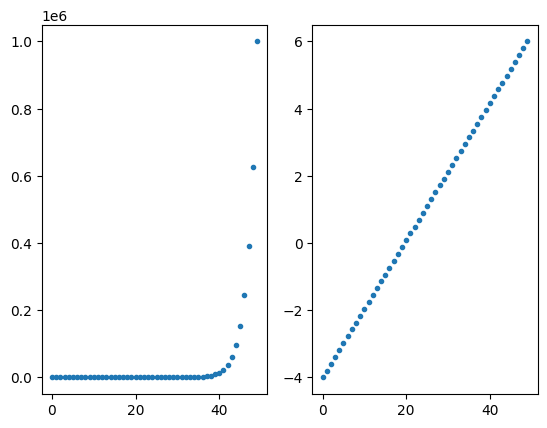

In [198]:
print (alpha_s)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(alpha_s,".")
ax2.plot(np.log10(alpha_s), ".")

**Exercise 7** : (1) For each  `alpha` in `alpha_s`,  fit a ridge model. 
You can  use `ridge.set_params`. See : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html. 
 

(2) Plot the  coefficients (without the intercept) w.r.t.  `log10(alpha)`. What do you observe ? 

(3) (**Optional** ) Create a linear regression model, compare the coefficients given by the OLS estimator with those you get with a Ridge model with a small  `alpha`. 


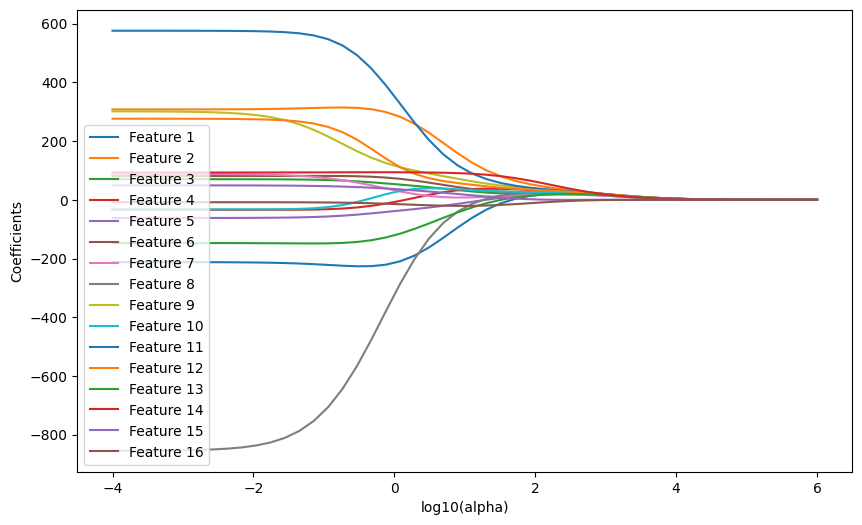

In [199]:
# Answer for Exercise 7

coefs_ridge = []
plt.figure(figsize=(10, 6))

for alpha in alpha_s: 
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(XtrainScaled, Ytrain)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge)  # Convert to numpy array for easier plotting

for i in range(coefs_ridge.shape[1]):  # Iterate over each feature
    plt.plot(np.log10(alpha_s), coefs_ridge[:, i], label=f"Feature {i+1}")

plt.xlabel("log10(alpha)")
plt.ylabel("Coefficients")
plt.legend()
plt.show()

**Lasso**

We will do the same questions as in  Exercise 7 but for Lasso. 

For that, we will use   `sklearn.linear_model.lasso_path`. 
See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html 

Note that the output of `lasso_path` is a  `tuple`. 
You can read this example : https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lasso_lars_elasticnet_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-lasso-lars-elasticnet-path-py

(Also :  note  the shape of the array of  coefficients output by `lasso_path`...)

In [200]:
from sklearn.linear_model import lasso_path
alphas_lasso,coefs_lasso,_=lasso_path(XtrainScaled,Ytrain,n_alphas=50)
coefs_lasso.shape,coefs_ridge.shape

((16, 50), (50, 16))

(in coefs_ridge the rows corresponded to the different values of alpha and the columns were the features, it is the opposite for the output of `lasso_path`).

We used 50 values for alphas (those values are automatically determined by `lasso_path`). 

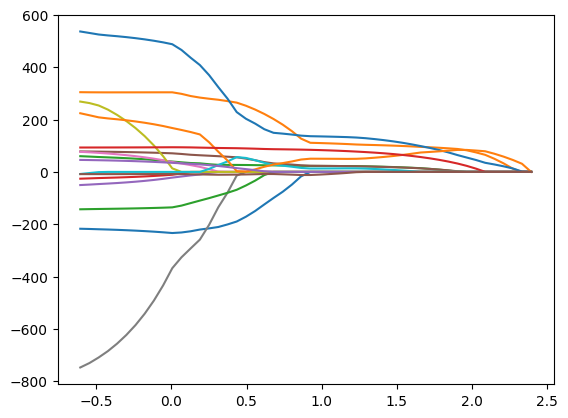

In [201]:
coefs_lasso=coefs_lasso.T
plt.plot(np.log10(alphas_lasso),coefs_lasso)
plt.show()

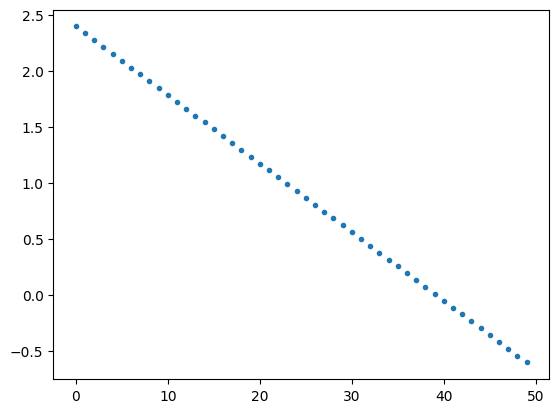

In [202]:
#the values of alphas chosen by defaults are also on a logarithmic scale
plt.plot(np.log10(alphas_lasso),'.')

Text(0, 0.5, 'Lasso coefficients')

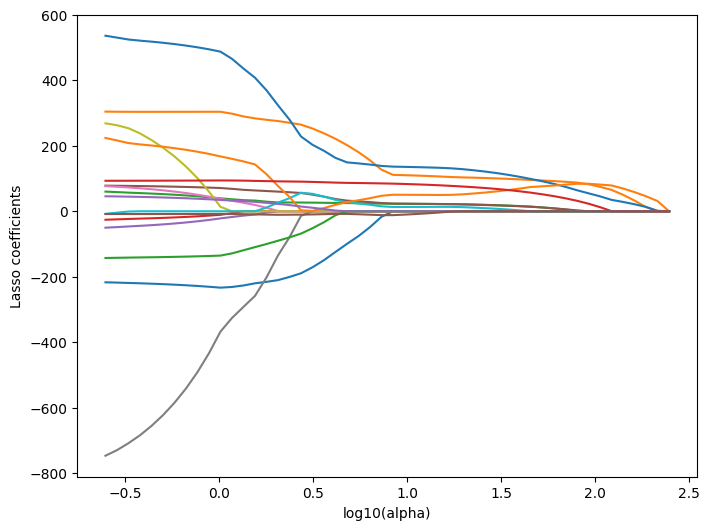

In [203]:
fig, ax= plt.subplots(figsize=(8,6))
ax.plot(np.log10(alphas_lasso),coefs_lasso)
ax.set_xlabel('log10(alpha)')
ax.set_ylabel('Lasso coefficients')

-------------------

Now let us show that **Lasso will help us select  the features**,  i.e. some coefficients will be set to 0 when  `alpha` increases. 


**Exercise 8** :   Compute the number `nb` of zeros among the **Lasso** coefficients for each  `alpha`. (Hint in the next cell)

Plot `nb` w.r.t. `log10(alphas)`.


In [204]:
# Hint for Ex. 8

ind=np.array([[0,1,1],[0,1,1],[0,1,0]])

print ("1.\n", ind)
print ("2.\n", ind==0)
print ("3. Le nombre de 0 de chaque colonne est :\n ", (ind == 0).sum(axis = 0))
print ("4. Le nombre de 0 de chaque ligne est : \n", (ind == 0).sum(axis = 1))


1.
 [[0 1 1]
 [0 1 1]
 [0 1 0]]
2.
 [[ True False False]
 [ True False False]
 [ True False  True]]
3. Le nombre de 0 de chaque colonne est :
  [3 0 1]
4. Le nombre de 0 de chaque ligne est : 
 [1 1 2]


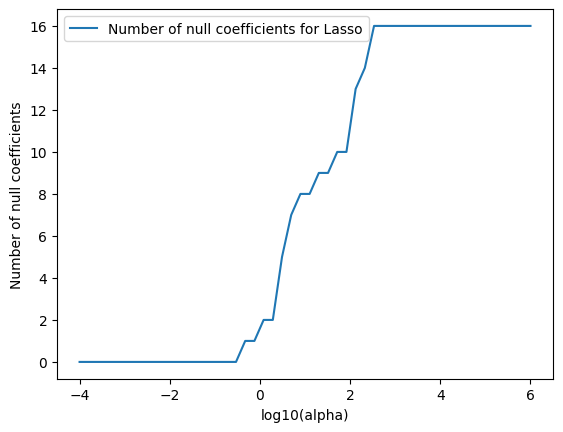

In [238]:
# Answer for Ex. 8
nb_null_lasso = []
for alpha in alpha_s:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(XtrainScaled, Ytrain)
    nb_null_lasso.append((lasso.coef_ == 0).sum())

plt.plot(np.log10(alpha_s), nb_null_lasso, label="Number of null coefficients for Lasso")
plt.xlabel("log10(alpha)")
plt.ylabel("Number of null coefficients")
plt.legend()
plt.show()

**Exercise 9** :  Compute the number `nb` of  0 among the  **Ridge** coefficients for each `alpha`. 

Plot `nb` w.r.t. `log10(alphas)`.

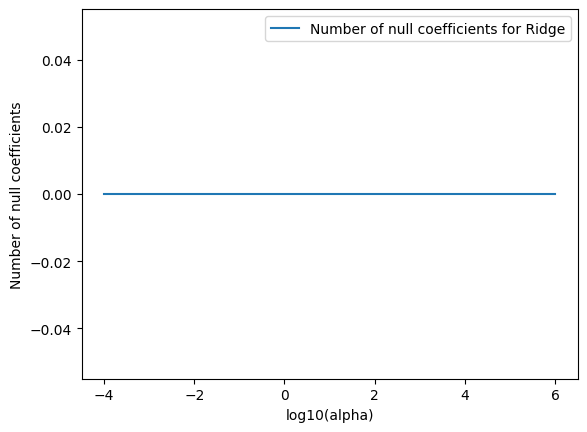

In [244]:
# Answer for Ex. 9
nb_null_ridge = []
for alpha in alpha_s:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(XtrainScaled, Ytrain)
    nb_null_ridge.append((ridge.coef_ == 0).sum())

plt.plot(np.log10(alpha_s), nb_null_ridge, label="Number of null coefficients for Ridge")
plt.xlabel("log10(alpha)")
plt.ylabel("Number of null coefficients")
plt.legend()
plt.show()

----------------


## 2. Cross Validation for the Lasso and Ridge  hyperparameter $\alpha$   <a class="anchor" id="chapter2"></a>

In the next exercises, we will select an optimal `alpha` among the values in `alpha_s` by cross-validation.

We will use `sklearn.linear_model.RidgeCV` and `sklearn.linear_model.LassoCV`.

Reference :

1. `sklearn.linear_model.RidgeCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

2. `sklearn.linear_model.LassoCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html


In [207]:
from sklearn.linear_model import RidgeCV, LassoCV
alpha_s = np.logspace(-4,6,50)

**Exercise 10** : (1) Create a model for  `RidgeCV`, call it `ridgeCV`, with parameters `alphas=alpha_s`  and `store_cv_values=True`. Fit  `ridgeCV` on  `(XtrainScaled,Ytrain)`. 

Remark : to be completely rigorous, we should have created a pipeline containing the scaler to avoid what we call "data leakage" in the CV calculation. We will ignore this detail here to simplify. 

(2) We have 50 different values for `alpha`. For each  `alpha`, how many  `score`s do we get for the cross-validation ? Read the info concerning the parameter `cv_values_` of `RidgeCV` in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html 



In [252]:
# Answer for Ex. 10

ridgeCV = RidgeCV(alphas = alpha_s, store_cv_values=True)
ridgeCV.fit(XtrainScaled, Ytrain)

for alpha, cv_values in zip(alpha_s, ridgeCV.cv_values_):
    print(f"alpha = {alpha}, CV = {cv_values.mean()}")

alpha = 0.0001, CV = 418347.1125862905
alpha = 0.00015998587196060574, CV = 236113.89878091
alpha = 0.0002559547922699536, CV = 415076.4148340795
alpha = 0.00040949150623804275, CV = 191087.48354175405
alpha = 0.0006551285568595509, CV = 61239.05918684516
alpha = 0.0010481131341546852, CV = 510491.9951998422
alpha = 0.0016768329368110084, CV = 9376.870607754327
alpha = 0.002682695795279727, CV = 16880.167667999136
alpha = 0.004291934260128779, CV = 48667.64548073938
alpha = 0.006866488450042998, CV = 25424.536417895815
alpha = 0.010985411419875584, CV = 31229.280098328854
alpha = 0.01757510624854793, CV = 56970.389133785255
alpha = 0.028117686979742307, CV = 34075.07626848111
alpha = 0.04498432668969444, CV = 1284.0507475773995
alpha = 0.07196856730011521, CV = 25543.346961677253
alpha = 0.11513953993264481, CV = 73297.18467965744
alpha = 0.18420699693267165, CV = 20947.47627451605
alpha = 0.29470517025518095, CV = 54977.04078268141
alpha = 0.47148663634573945, CV = 108820.05709293489


**Exercise 11** : For each  alpha, give the mean of the scores, and call it `alpha_score`.

In [209]:
# Hint for Exercise 11 : 

ind2=np.array([[1,2,3],[4,5,6]])

print ("1\n",ind2.shape)
print ("2\n",ind2.mean(axis = 0))
print ("3\n",ind2.mean(axis = 1))


1
 (2, 3)
2
 [2.5 3.5 4.5]
3
 [2. 5.]


In [210]:
# Answer for Ex. 11




**Exercise 12** : Plot `alpha_score` w.r.t. `log10(alpha_s)`. Which `alpha` are we going to choose ? Display the coefficients for the chosen  `alpha`.

Hint : read the attributes `alpha_` and `coef_` of ridgecv.

In [211]:
# Answer for Exercise 12







We will do the same for **Lasso** using `LassoCV`. 

**Remark**  :  By default, `LassoCV` uses 5-fold cross-validation, which is different from *Leave-One-Out Cross-Validation* used in `RidgeCV`. 




In [212]:
from sklearn.linear_model import LassoCV
lassoCV=LassoCV(n_alphas=50)
lassoCV.fit(XtrainScaled,Ytrain)
lassoCV.mse_path_.shape

(50, 5)

"5" corresponds to the 5-folds and "50" corresponds to the 50 values of alpha. Here we let LassoCV choose those 50 values. 

Pay attention to the fact that,  again, the rows and the columns are reversed compared to RidgeCV output : that is why we use the parameter "axis=1" in the next cell. 

NB : the default value for cv is 5 here (using  leave-one-out for Lasso would be too costly (no fast formula, contrary to Ridge)). 

In [213]:
alpha_score=lassoCV.mse_path_.mean(axis=1) 
alpha_score.shape

(50,)

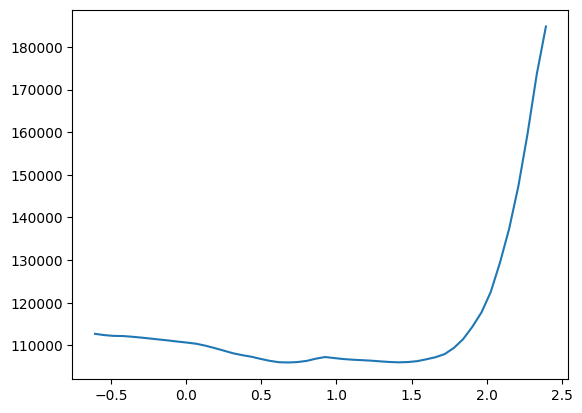

In [214]:
alphas=lassoCV.alphas_
plt.plot(np.log10(alphas),alpha_score)

In [215]:
print("best alpha for lasso : ", lassoCV.alpha_)
print("lasso coef for the best alpha : ", lassoCV.coef_)

best alpha for lasso :  4.783179587705159
lasso coef for the best alpha :  [-99.92030224 202.5757594   25.01239288   0.          -0.
  32.47945631   0.          -0.           0.          27.91148338
 150.0851833   27.07622842  -0.          86.82862045   0.
  -8.03825832]


## OPTIONAL : Comparing estimators

Remark about the standardization : the standardization needs to be  done in three steps : 
- first we use `fit` on the train set, which means  the standardizer computes the mean and the std for each feature in your train set.
- Then you transform the data : it means, for each column, you remove the mean computed before (i.e. the means computed on the **train** set) and divide by the std computed before (i.e. the std computed on the **train** set).
- But pay attention to the fact that  you must transform the train set **and** the test set. But the fit has to be done on the train set  only !

Previously, we used the shorter syntax `fit_transform` that allows you to do the `transform` calculation and then to `fit`. We could do that because we only used the train set. But for the test set, we must only use `transform`. 

In [216]:
XtestScaled=scaler.transform(Xtest)

**Prediction of Salary on the test set using the OLS estimator**

(np.float64(-47.125),
 np.float64(2529.625),
 np.float64(-84.28768799282899),
 np.float64(2492.462312007171))

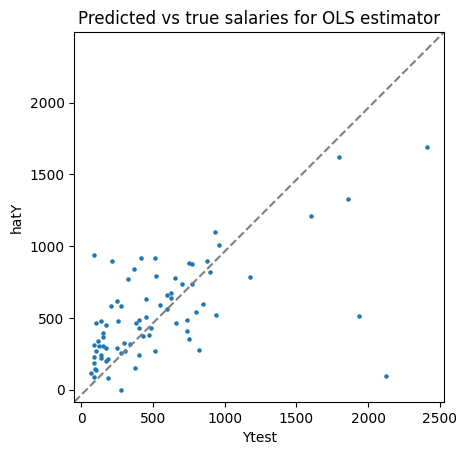

In [217]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(Xtrain,Ytrain)# no need to scale for OLS if you just want to predict (unless the solver works best with scaled data)
# the predictions  should not be different with or without standardization (could differ only owing to numerical problems)
hatY_LinReg = LinReg.predict(Xtest)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_LinReg, s = 5)
ax.plot([0, 1], [0, 1],transform=ax.transAxes, ls = '--', c = 'gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for OLS estimator')
ax.axis('square')

**Optional Exercise 1**
Do the same with the Ridge estimator (with alpha chosen by CV). 

In [218]:
# Answer for Optional Exercise 1


**Optional Exercise 2** Do the same with Lasso with alpha chosen by CV. 

In [219]:
# Answer for Optional Exercise 2


**Calculation of the best alpha with a "BIC criterion".**
Here is an alternative method to choose the "best" alpha : 

In [220]:
from sklearn.linear_model import LassoLarsIC
lassoBIC=LassoLarsIC(criterion='bic')
lassoBIC.fit(Xtrainscaled,Ytrain)
print("best alpha chosen by BIC criterion :",lassoBIC.alpha_)
print("best alpha chosen by CV :",lassoCV.alpha_)

NameError: name 'Xtrainscaled' is not defined

**Comparison between predicted salary and true salary for "LassoBIC" estimator :** 

In [ ]:
lasso.set_params(alpha = alpha_BIC)
lasso.fit(XtrainScaled,Ytrain)

hatY_BIC = lasso.predict(Xtest)

fig, ax = plt.subplots()
ax.scatter(Ytest, hatY_BIC, s = 5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls = '--', c = 'gray')
ax.set_xlabel('Ytest')
ax.set_ylabel('hatY')
ax.set_title('Predicted vs true salaries for LassoBIC estimator')
ax.axis('square')

**Optional Exercise 3** Compute the MSE for these four different estimators (LassoCV, LassoBIC, OLS, RidgeCV)

In [ ]:
# answer for Optional Exercise 3


**Optional Exercise 4** Display the boxplot of the absolute errors for each estimator.   

In [ ]:
# answer for Optional  Exercise 4


**Optional Exercise 5**
Based on the above information, which estimator would you recommend?

In [ ]:
# answer fot Optional Exercise 5